# Test to read Filters,  Optical Throughput data and CCD-QE
=========================================================================================


- author Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : May 27th 2017


In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import pandas as pd

In [15]:
import pandas as pd
import os
import re

In [16]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Few file definitions

In [17]:
files_idealfilters=['fdata/ideal_u.txt','fdata/ideal_g.txt','fdata/ideal_r.txt','fdata/ideal_i.txt','fdata/ideal_z.txt','fdata/ideal_y4.txt']

In [18]:
file_lsstoptccd='fdata/LSST-ThroughputCCD.xlsx'

# Read Filter data

In [19]:
NBFILES=len(files_idealfilters)

In [20]:
data_u=np.loadtxt(files_idealfilters[0],skiprows=2)
data_g=np.loadtxt(files_idealfilters[1],skiprows=2)
data_r=np.loadtxt(files_idealfilters[2],skiprows=2)
data_i=np.loadtxt(files_idealfilters[3],skiprows=2)
data_z=np.loadtxt(files_idealfilters[4],skiprows=2)
data_y4=np.loadtxt(files_idealfilters[5],skiprows=2)

In [21]:
wl_u=data_u[:,0]
u=data_u[:,1]
#
wl_g=data_g[:,0]
g=data_g[:,1]
#
wl_r=data_r[:,0]
r=data_r[:,1]
#
wl_i=data_i[:,0]
i=data_i[:,1]
#
wl_z=data_z[:,0]
z=data_z[:,1]
#
wl_y4=data_y4[:,0]
y4=data_y4[:,1]

In [22]:
print u.shape
print g.shape
print r.shape
print i.shape
print z.shape
print y4.shape

(901,)
(901,)
(901,)
(901,)
(901,)
(901,)


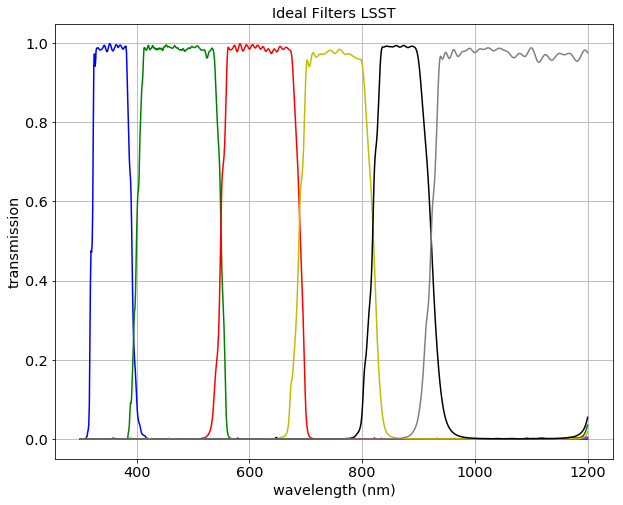

In [23]:
plt.plot(wl_u,u,'b-')
plt.plot(wl_g,g,'g-')
plt.plot(wl_r,r,'r-')
plt.plot(wl_i,i,'y-')
plt.plot(wl_z,z,'k-')
plt.plot(wl_y4,y4,'-',color='grey')
plt.grid()
plt.title("Ideal Filters LSST")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")

## Read Optical Thorughput and CCD

In [24]:
data_throuthput=pd.read_excel(file_lsstoptccd,skiprow=1)

In [25]:
data_throuthput.head()

,WL,THROUGHPUT,CCD1,CCD2
0,300,0.327075,30.0,0.300
1,301,0.337937,30.4,0.304
2,302,0.349236,30.8,0.308
3,303,0.359444,31.2,0.312
4,304,0.368626,31.6,0.316


In [26]:
data_throuthput.tail()

,WL,THROUGHPUT,CCD1,CCD2
896,1196,0.846457,2.0,0.02
897,1197,0.846416,2.0,0.02
898,1198,0.846760,2.0,0.02
899,1199,0.844010,2.0,0.02
900,1200,0.844661,2.0,0.02


In [27]:
wl2=data_throuthput["WL"]
throughput=data_throuthput["THROUGHPUT"]
ccdqe=data_throuthput["CCD2"]
trans_opt_elec=data_throuthput["THROUGHPUT"]*data_throuthput["CCD2"]

In [28]:
trans_opt_elec_u=trans_opt_elec[0:u.shape[0]]
trans_opt_elec_g=trans_opt_elec[0:g.shape[0]]
trans_opt_elec_r=trans_opt_elec[0:r.shape[0]]
trans_opt_elec_i=trans_opt_elec[0:i.shape[0]]
trans_opt_elec_z=trans_opt_elec[0:z.shape[0]]
trans_opt_elec_y4=trans_opt_elec[0:y4.shape[0]]

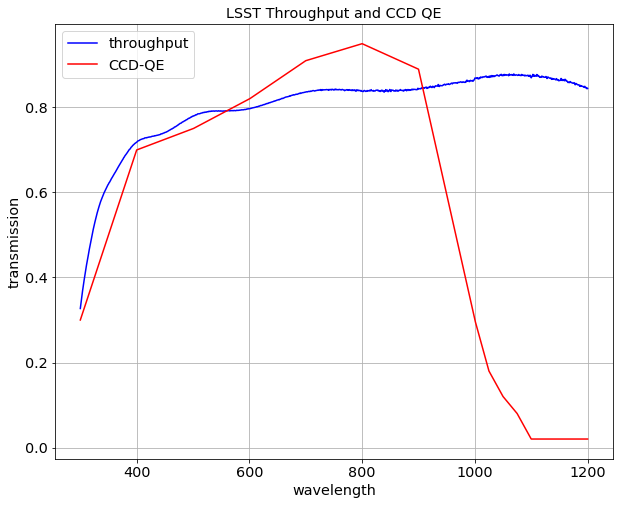

In [29]:
plt.plot(data_throuthput["WL"],data_throuthput["THROUGHPUT"],'b-',label='throughput')
plt.plot(data_throuthput["WL"],data_throuthput["CCD2"],'r-',label='CCD-QE')
plt.grid()
plt.title("LSST Throughput and CCD QE")
plt.xlabel("wavelength")
plt.ylabel("transmission")
plt.legend()

# Combine filter and optics and detector transmission 

In [30]:
tot_u=u*trans_opt_elec_u
tot_g=g*trans_opt_elec_g
tot_r=r*trans_opt_elec_r
tot_i=i*trans_opt_elec_i
tot_z=z*trans_opt_elec_z
tot_y4=y4*trans_opt_elec_y4

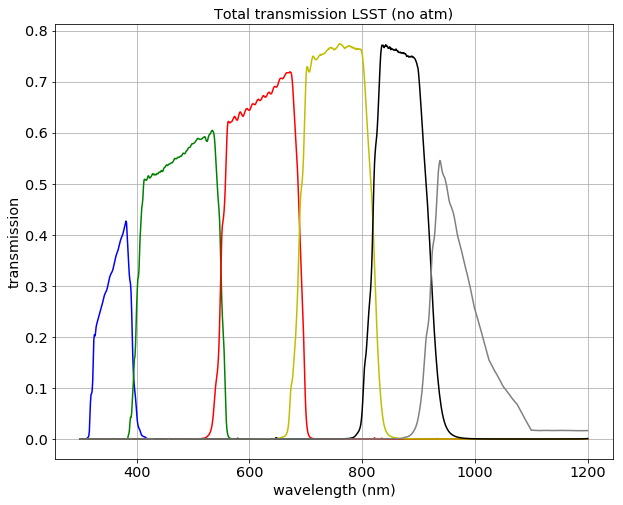

In [31]:
plt.plot(wl_u,tot_u,'b-')
plt.plot(wl_g,tot_g,'g-')
plt.plot(wl_r,tot_r,'r-')
plt.plot(wl_i,tot_i,'y-')
plt.plot(wl_z,tot_z,'k-')
plt.plot(wl_y4,tot_y4,'-',color='grey')
plt.grid()
plt.title("Total transmission LSST (no atm)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("lsst-total-transm.png")